In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('../Input/bookes_data_category_clustered.parquet')
print(df.shape)
df.head()

(171205, 14)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,x_axis,y_axis,cluster,cluster_name
0,Its Only Art If Its Well Hung!,None,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,None,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,Comics & Graphic Novels,NaN,0.044563,-0.298286,1,Art
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,Biography & Autobiography,NaN,-0.070939,-0.392944,8,Biography
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,None,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,Religion,NaN,-0.168683,0.635882,4,Religion
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,Fiction,NaN,0.687696,0.131479,2,Fiction
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,Religion,5.0,-0.168683,0.635882,4,Religion


In [27]:
df_cluster_centroids = df[df['categories']==df['cluster_name']].drop_duplicates('categories')[['cluster_name', 'x_axis', 'y_axis']]
print(df_cluster_centroids.shape)
df_cluster_centroids.loc[12,'cluster_name'] = 'Juvenile'
df_cluster_centroids.loc[23,'cluster_name'] = 'Mind & Spirit'
df_cluster_centroids.loc[23,'y_axis'] = -0.057012
df_cluster_centroids.loc[103,'y_axis'] = -0.014546
df_cluster_centroids.loc[103,'cluster_name'] = 'Hobbies'
df_cluster_centroids

(11, 3)


,cluster_name,x_axis,y_axis
2,Religion,-0.168683,0.635882
3,Fiction,0.687696,0.131479
9,Social Science,-0.181708,0.064907
12,Juvenile,0.250562,-0.401286
14,History,-0.225634,0.158364
23,Mind & Spirit,-0.277774,-0.057012
50,Art,-0.125144,0.025386
81,Business & Economics,-0.313274,-0.136657
84,Computers,-0.164147,-0.034546
103,Hobbies,-0.140150,-0.014546


In [16]:
# Function to plot density for two publishers side by side with category annotations
def plot_publishers_density(df_books, df_centroids, publisher1, publisher2):
    # Filter the dataframe for the two publishers
    df_pub1 = df_books[df_books['publisher'] == publisher1]
    df_pub2 = df_books[df_books['publisher'] == publisher2]
    
    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
    
    # Plot density for the first publisher on the first subplot
    sns.kdeplot(ax=axes[0], x=df_pub1['x_axis'], y=df_pub1['y_axis'], cmap="Reds", shade=True, bw_adjust=.9)
    axes[0].set_title(f'Density Plot for {publisher1}')
    axes[0].set_xlabel('X Axis')
    axes[0].set_ylabel('Y Axis')
    

    
    # Plot density for the second publisher on the second subplot
    sns.kdeplot(ax=axes[1], x=df_pub2['x_axis'], y=df_pub2['y_axis'], cmap="Blues", shade=True, bw_adjust=.9)
    axes[1].set_title(f'Density Plot for {publisher2}')
    axes[1].set_xlabel('X Axis')
    
    
    # Annotate cluster centroids on both subplots
    for i in range(len(df_centroids)):
        axes[0].text(df_centroids.iloc[i]['x_axis'], df_centroids.iloc[i]['y_axis'], df_centroids.iloc[i]['cluster_name'],
                     fontsize=7, ha='center', color='black', weight='bold')
        axes[1].text(df_centroids.iloc[i]['x_axis'], df_centroids.iloc[i]['y_axis'], df_centroids.iloc[i]['cluster_name'],
                     fontsize=7, ha='center', color='black', weight='bold')
    
    plt.show()



/tmp/ipykernel_220150/2857805036.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[0], x=df_pub1['x_axis'], y=df_pub1['y_axis'], cmap="Reds", shade=True, bw_adjust=.9)
/tmp/ipykernel_220150/2857805036.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], x=df_pub2['x_axis'], y=df_pub2['y_axis'], cmap="Blues", shade=True, bw_adjust=.9)


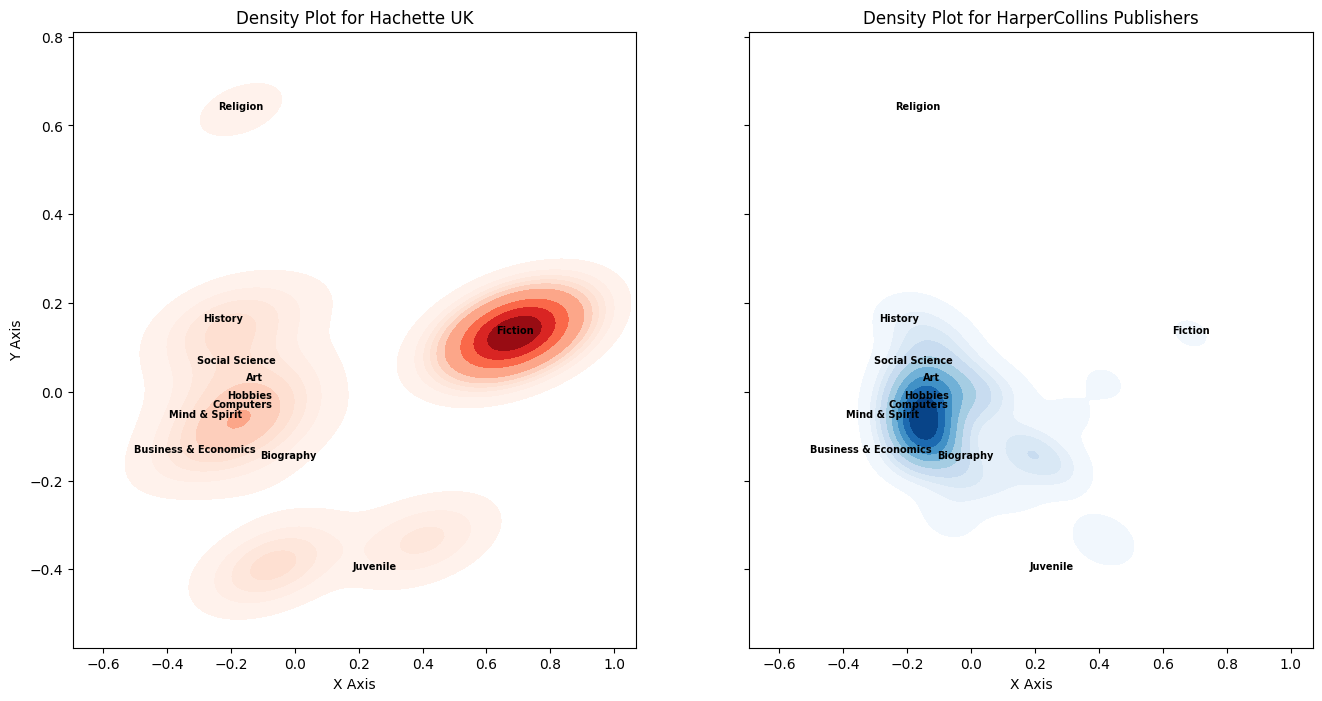

In [28]:
# Call the function with two publishers
plot_publishers_density(df, df_cluster_centroids, "Hachette UK", "HarperCollins Publishers")